In [201]:
# 202AD134-SARANYA P
# LINEAR ,POLYNOMIAL REGRESSION

import pandas as pd
import numpy as np
from sklearn import linear_model
!pip install word2number
from word2number import w2n
from sklearn.model_selection import train_test_split

In [69]:
df=pd.read_csv("C:\\Users\\Saranya\\Downloads\\house_prediction - house_prediction.csv")

In [70]:
df

,area,price
0,1000,5000
1,2000,10000
2,3000,15000
3,4000,20000
4,5000,25000
5,6000,30000
6,7000,35000
7,8000,40000
8,9000,45000
9,10000,50000


In [71]:
x=df[["area"]]
y=df["price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,train_size=0.7)
y

0         5000
1        10000
2        15000
3        20000
4        25000
5        30000
6        35000
7        40000
8        45000
9        50000
10       55000
11       60000
12     5000000
13    10000000
Name: price, dtype: int64

In [72]:
y_train

4        25000
1        10000
12     5000000
0         5000
13    10000000
9        50000
8        45000
11       60000
5        30000
Name: price, dtype: int64

In [73]:
x_test

,area
3,4000
7,8000
6,7000
2,3000
10,11000


In [74]:
reg=linear_model.LinearRegression()

In [75]:
reg.fit(x_train,y_train)

LinearRegression()

In [76]:
y_pred=reg.predict(x_test)

In [77]:
y_pred_all=reg.predict(x)
y_pred_all

array([5.0e+03, 1.0e+04, 1.5e+04, 2.0e+04, 2.5e+04, 3.0e+04, 3.5e+04,
       4.0e+04, 4.5e+04, 5.0e+04, 5.5e+04, 6.0e+04, 5.0e+06, 1.0e+07])

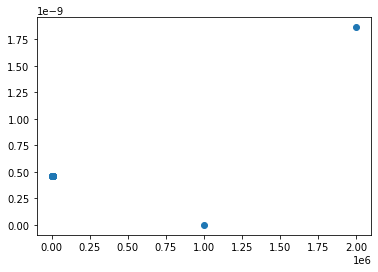

In [78]:
#resudial plots to find the model is biased or not
import matplotlib.pyplot as plt 
resudial=abs(y-y_pred_all)
plt.scatter(x,resudial)
#random distribution un-biased model

In [79]:
#evaluate model
#mean absolute error
#outliers doesn't affect
from sklearn.metrics import mean_absolute_error
error_val1=mean_absolute_error(y_test,y_pred)
error_val1


4.602043190971017e-10

In [80]:
#mean squared error
#outliers affect the score
#units are not same as the feature unit
from sklearn.metrics import mean_squared_error
error_val2=mean_squared_error(y_test,y_pred)
error_val2

2.1179330927154733e-19

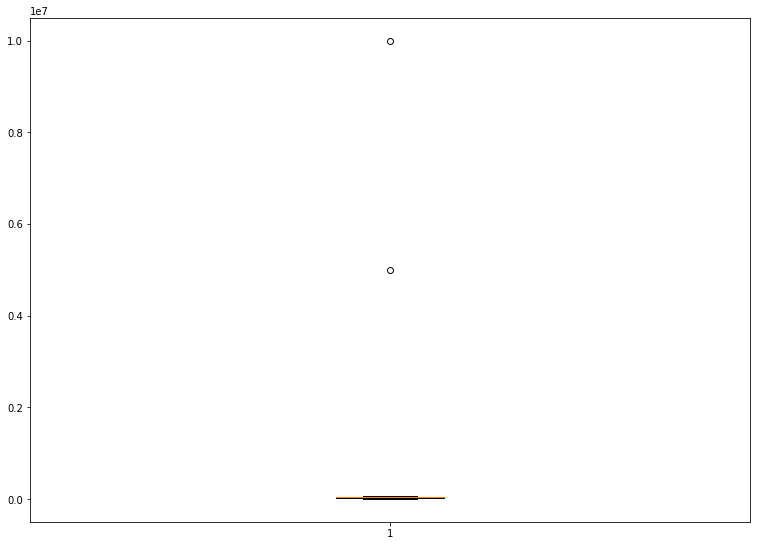

In [91]:
fig = plt.figure(figsize =(10, 7))
ax=fig.add_axes([0,0,1,1])
ax.boxplot(y)
plt.show()
#2 outliers

In [95]:
#root mean squared error
import math
from sklearn.metrics import mean_squared_error
error_val3=mean_squared_error(y_test,y_pred)
error_val3=math.sqrt(error_val3)
error_val3

4.602100708063083e-10

In [106]:
#mae is not affected by otliers and distance is very small
#mse is highly affected by outliers but distance is very high(distance - weightage for outliers)
#huber function-The weightage is determined by user
from scipy.special import huber
val=huber(error_val2,6)
val


1.270759855629284e-18

In [159]:
delta1=1.5
mse_huber1 = delta1 * (np.abs(x1) - 0.5 * delta1)
mse_huber=np.square(x1)*0.5
y_huber1 = np.where(np.abs(x1) <= delta1, mse_huber, mae_huber1)


In [160]:
x1 = np.arange(-100, 100, 1)
y_mae = np.abs(x1)
y_mse=np.square(x1)

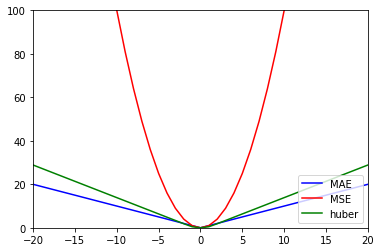

In [161]:
plt.plot(x1, y_mae, "blue", label="MAE")
plt.plot(x1, y_mse, "red", label="MSE")
plt.plot(x1,y_huber1,"green",label="huber")
plt.legend(loc="lower right")
plt.axis([-20, 20, 0, 100])
plt.show()
#by huber function we can determine whether the ooutlier is important or not

In [208]:
df2=pd.read_csv("C:\\Users\\Saranya\\Downloads\\predicted_house_price.csv")

In [209]:
df2

,Unnamed: 0,area,height_cus,prices
0,0,6000,5.6,30000
1,1,7000,5.5,35000
2,2,8000,6.0,40000
3,3,9000,7.0,45000
4,4,10000,7.1,50000
5,5,1000000,6.8,5000000
6,6,1000,6.0,5000
7,7,2000,5.7,10000
8,8,3000,5.9,15000
9,9,4000,7.2,20000


In [263]:
from sklearn.metrics import r2_score
r2_score_reg=r2_score(y_pred,y_test)

In [247]:
x2= df2.iloc[:, :-1].values  
y2= df2.iloc[:, 3].values 
x2=pd.DataFrame(x2,columns=["n","area","height_cus"])
y2=pd.DataFrame(y2,columns=["price"]) 
y2
x2=x2.drop(columns=["n"])



In [248]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,random_state=1,train_size=0.7)
x2_test


,area,height_cus
2,8000.0,6.0
3,9000.0,7.0
4,10000.0,7.1
9,4000.0,7.2


In [249]:
reg2=linear_model.LinearRegression()
reg2.fit(x2_train,y2_train)

LinearRegression()

In [261]:
x.shape


(14, 1)

In [255]:
y_pred2=reg2.predict(x2_test)
y_pred2

array([[40000.],
       [45000.],
       [50000.],
       [20000.]])

In [256]:
#r2 score for new model which has unwanted feature
from sklearn.metrics import r2_score
r2_score(y_pred2,y2_test)
#it gives same value so we beleive that our model is great but it is not true.so,use adjusted r2 score to determine the models performance

1.0

In [276]:

#r2 score is 1 so answer is 0
#if r2 score =0.8
adj_r2_reg=(1-r2_score_reg)*(len(df)-1)/(len(df)-x.shape[1]-1)
adj_r2_reg

0.0

In [279]:
r2_score_reg2=0.8
adj_r2_reg=1-(1-r2_score_reg2)*(len(df)-1)/(len(df)-x.shape[1]-1)
adj_r2_reg

0.7833333333333333

In [280]:
adj_r2_reg2=1-(1-r2_score_reg2)*(len(df2)-1)/(len(df2)-x2.shape[1]-1)
adj_r2_reg2

0.75

In [ ]:
#the adjusted r2_score is decreased so ,the newly added column doesn't make any effect on target variable